<a href="https://www.kaggle.com/code/ayushs9020/inventing-optimizers-from-scratch-hubmap?scriptVersionId=132344666" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Optimizers ⚙️

<img src = "https://i.imgflip.com/2s1kjh.jpg" width = 400>

Optimizers are `algorithms` that `help deep learning models` learn `more effectively`. They do this by `updating the model's parameters` in a way `that minimizes the loss function`. The most common optimizers are 
* $Stochastic$ $Gradient$ $Descent$ $SGD$
* $AdaGrad$ 
* $RMSProp$
* $Adam$ 

In [1]:
! pip install segmentation_models_pytorch

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import segmentation_models_pytorch as smp

import cv2
import os
import numpy as np 
from PIL import Image
import tqdm
import json

import tensorflow as tf


import albumentations as A
from albumentations.pytorch import ToTensorV2

import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn

train_dir = "/kaggle/input/hubmap-hacking-the-human-vasculature/train"
test_dir = "/kaggle/input/hubmap-hacking-the-human-vasculature/test"

a = A.Compose(
            [
                A.Resize(width = 512 , height = 512) , 
                A.Normalize(
                    mean = [0 , 0 , 0] , 
                    std = [1 , 1 , 1] , 
                    max_pixel_value = 255
        ) , ToTensorV2()
            ]
)

class hubmapDataset(Dataset):
    
    def __init__(self, image_dir, labels_file , augments = False):
        
        with open(labels_file, 'r') as json_file:
            self.json_labels = [
                json.loads(line) 
                for line in json_file
            ]

        self.image_dir = image_dir
#         self.transform = transform
        self.augments = augments

    __len__ = lambda self : len(self.json_labels)    
        
    def __getitem__(self, idx):
        
        image_path = os.path.join(self.image_dir, f"{self.json_labels[idx]['id']}.tif")
        image = Image.open(image_path)
        
        if self.augments:
            
            image = a(image = image)["image"]
        
        mask = np.zeros((512, 512), dtype=np.float32)

        for annot in self.json_labels[idx]['annotations']:

            cords = annot['coordinates']
            
            if annot['type'] == "blood_vessel":
                
                for cord in cords:
                    
                    rr, cc = np.array([i[1] for i in cord]), np.asarray([i[0] for i in cord])
                    
                    mask[rr, cc] = 1

        image = torch.tensor(np.array(image), dtype=torch.float32).permute(2, 0, 1)  # Shape: [C, H, W]
        mask = torch.tensor(mask, dtype=torch.float32)

#         if self.transform:
#             image = self.transform(image)

        return image, mask

train_dataset = hubmapDataset(image_dir = train_dir, labels_file = '../input/hubmap-hacking-the-human-vasculature/polygons.jsonl')
train_dataloader = DataLoader(train_dataset, batch_size = 4, shuffle = True)

for data in tqdm.tqdm(train_dataloader , total = len(train_dataloader)):
    img , mask = data
    
img = img[-1 , -1 , : , :]
mask = mask[-1 , : , :]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Preparing metadata (setup.py) ... - done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=d1c305ec4a299fd359f925d872401c256e694ea102b9a16b1e0c20e44366b4c9
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60966 sha256=6ecdb62cc141f77d5fac0f85f7175e46059297aa078ffea600b8449588d24488
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientnet-pytorch pretrainedmodels
/kaggle/input/hubmap-hacking-the-human-vasculature/sample_submission.csv
/kaggle/input/hubmap-hacking-the-human-vasculature/ti

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Lets assume we have $2$ images like 

In [2]:
img , mask

(tensor([[176., 172., 170.,  ..., 172., 173., 173.],
         [198., 201., 184.,  ..., 170., 170., 172.],
         [202., 225., 204.,  ..., 168., 168., 170.],
         ...,
         [201., 224., 228.,  ..., 241., 210., 167.],
         [213., 223., 210.,  ..., 241., 220., 177.],
         [187., 190., 172.,  ..., 238., 225., 184.]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]))

If we try to visualize them 

Orginal Image


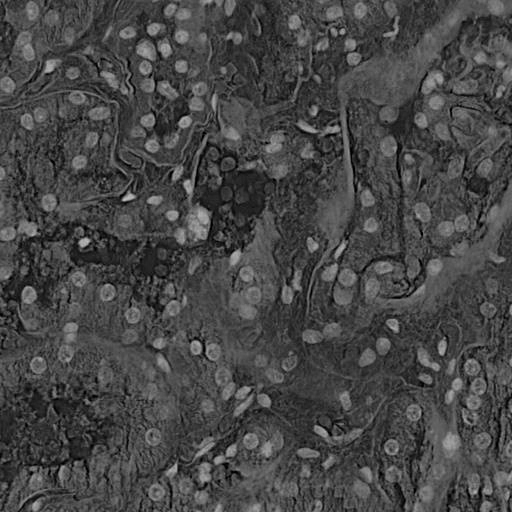

In [3]:
print("Orginal Image")
transforms.ToPILImage()(img)

Masked Image


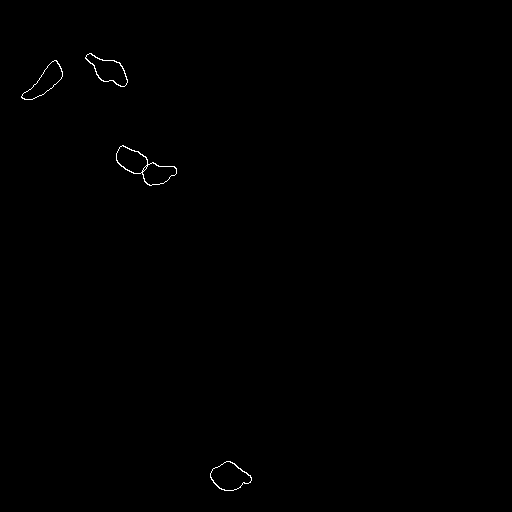

In [4]:
print("Masked Image")
transforms.ToPILImage()(mask)

Lets assume we want to calculate how different this image is from the other image. 

We know that images are just a collection of pixels. Lets asusme we denote every pixel with a number. Both of these are a `black and white`. So neither we have the complexity of different channels nor we are bounded by a large range of values $(0 , 255)$. For laziness, we choose an image to be `black and white`. 

So we can represent our images in the form of large `matrices`. 

Lets get not much deep into this. We will assume that `God just gave us a way to calculate how different is an image from its mask.`

In [5]:
class God_Method(nn.Module):
    
    def __init__(self):
        
        super(God_Method,self).__init__()
        
        self.diceloss = smp.losses.DiceLoss(mode='binary')
        self.binloss = smp.losses.SoftBCEWithLogitsLoss(reduction = 'mean' , smooth_factor = 0.1)

    def forward(self, output, mask):
        
        output = torch.squeeze(output)
        mask = torch.squeeze(mask)
        
        dice = self.diceloss(output , mask)
        bce = self.binloss(output , mask)
        
        loss = dice * 0.7 + bce * 0.3
        
        return loss

In [6]:
our_method = God_Method()
our_method(img , mask)

tensor(50.6378)

So we can say that according to the `God Method`, the difference between `img` and `mask` is around $50.7774$ (as of this run). Lets give this `difference` a fancy name `Loss`. Also we will give this `God Method` a different name as `Loss Function`.

We can assume that the less the `Loss Function` will be, the more similar the `image` will be with its `mask`. So if we try to create a model that takes `image` as input and lets say give an output similar to the dimensions of the image be `output_image`, will be a good model if the `Loss` between the `output_image` and the `mask` is less, if the models intention is to predict the `mask`

We can interpret that as the `Loss` will decrease the accuracy of the model will increase. So by calculating the `Loss` we can improve our model. 

Now hear me out, models are just a `group` of `matrices`. Matrices consists of numbers. So if we try to change our numbers in the matrices according to a `function` $f(x)$ that is dependent on the `Loss` $(x)$. Then might be at some point we can reach a `unique set of numbers` that gives the lowest `Loss`

Lets break it in more simples terms 

# 1 | Basic Terminologies ✏️

First lets get a deep dive into some of the basic terminologies

* $Slope$
* $Diffrentiation$
* $Intercept$

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns 

from IPython.display import IFrame

Lets assume we have data like this

In [8]:
features = np.array([x for x in range(0 , 200 , 1)])
target = np.array([x for x in range(0 , 400 , 2)])

In [9]:
features , target

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

Lets assume there is a connection between the `target` , and `features`. By human instacne we know that every element in `target` is just a `double` of the corresponding element in `features`, or $target  = 2XFeatures$. 

Lets assume we change the target a little bit...

In [10]:
target = np.array([x + 1 for x in range(0 , 400 , 2)])

In [11]:
features , target

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

Now what could be the trend here..., We can see the code above and with the help of that we can say. That `target` value is just the `double + 1` of the corresponding element in `features`. or $target = 2Xfeatures + 1$

Till now the problem was really easy to solve, and thats why we used the brain only, But these are just examples. As we move closer to the real world. The examples/problems get difficulat and we find it harder to find proper trends in the two `arrays`. Thats we try to teach machine, how to find trend in the data. The formula we had before $target = 2Xfeature + 1$ is subjective to only one problem or a similar problem. But this formula can be generlized by the equation of `straight line`, which is $y = mx + b$

So what does this line means ???

Lets first try to plot the data we had on a scatter plot 

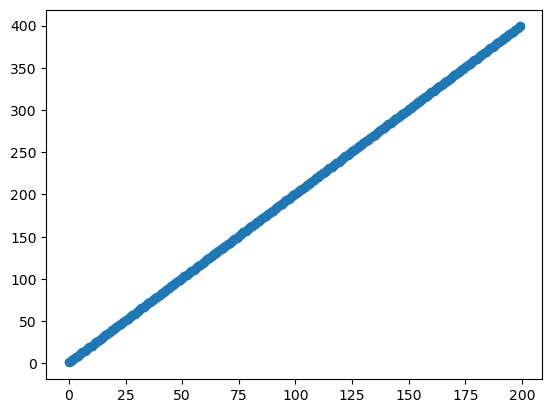

In [12]:
plt.scatter(features , target)

You can see we got a sequence of dots that resembles kind of straight line. 

Lets assume we have a line that tries to capture most of the points on this, like this

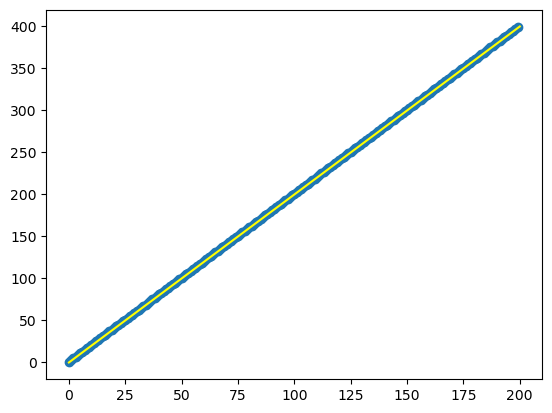

In [13]:
plt.scatter(features , target)
plt.plot([0 , 200] , [0 , 400] , "yellow")

Again by human intution we found the `best fit line`. But what if we want to generalize the things and kind of do not find the best fit line...?

First of all lets get a little bit more deep into equation $y = mx + b$

So what does these terms resembles in this eqution. 
* `m` is the slope of the line

## 1.1 | Slope of A function

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRJCTVoq09OqEdc6MWsy7UJu2w9kLZ_J-IqxjgBDsn_gqHzXt_NWi4DaC-JZ3sCiTJ94jA&usqp=CAU" width = 400>

Slope of a function shows how steep a function is, or the direction of a function at a given point on the curve.

Lets assume we have this curve $y = 4x^2$ the slope of this curve will be $y = 8x$

In [14]:
IFrame("https://www.desmos.com/calculator/zluqu5vyuh" , 1000 , 300)

So how do we calculate the `slope` of a line???

Lets assume we have a function $y = f(x)$,. To find the slope of a function, we simply diffrenctiate the function, thus, the slope of this line will be $y^` = f^`(x)$

## 1.2 | Diffrentiation

<img src = "https://preview.redd.it/differentiation-meme-v0-jt8ka3lrly2a1.png?auto=webp&s=c7261bc1ce1c7f57c2366e095d87db0478d1492d" width = 400>

Diffrentaition can be explained as getting a small value of a function.

lets assume we have a function `y = sin(x)`

A small strip at that function will demonstrate taking a derivative of that function `sin(x)`

Taking about the function we had taken before that is $y = 4x^2$

Taking its derivative we will get $$y = 8x$$ ($x{n^`} = nx^{n-1}$)

So the slope of $y = 4x^2$ can be represnted as 

In [15]:
IFrame("https://www.desmos.com/calculator/hrguwktg9q" , 1000 , 300)

**If you want to know more aboud diffrentiation, here is [3Blue1Brown](https://www.youtube.com/@3blue1brown/featured) => [Essence Of Calculas](https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr)**

So now we have a basic idea of `slope`

## 1.3 | Intercept

<img src = "https://media.makeameme.org/created/teacher-whats-the-e2c025118e.jpg" width = 400>

Now what `b` represents in the data. Usually it is called the `intercept`. Consider this graph of the equation $y = x$ or $y = 1x + b$ 

In [16]:
IFrame("https://www.desmos.com/calculator/gai0veg5fh" , 1000 , 300)

This line passes the axis at $(0 , 0)$. These coordinatesare called as the `intercepts` of this line. If we make `b` or `intercept` as $1$. The line will then pass from $(1 , -1)$. Basically the `intercept` moves a line in a plane. 

With that being said, Lets also undertand how the `slope` changes the line. If we make `m` as $2$. The line will rotate anti-clockwise. So as we increase the value of `m` or `slope`. The line moves anti-clockwise, And so the vice-versa, If we decrease the value of `m`, The slope will move in the clockwise direction. 

In short tweeking the values of `m` and `b` or `slope` and `intercept`. We can move the line in any direction and in any way we want `as long as it resembles a straight line`. We still cannot bend the line 

So now we have any data, we just need to difine the values of `slope` and `intercpet`. And we can get the best fit line. But still the question arises how do we generalize the values of these tuning parametes. 

In simple word we can say, How can we find a relation between the data we have and these tuning parameters. So that we only need to define that relationship and then we can easily predict the values.

Lets think that the value assigned to the line is this 

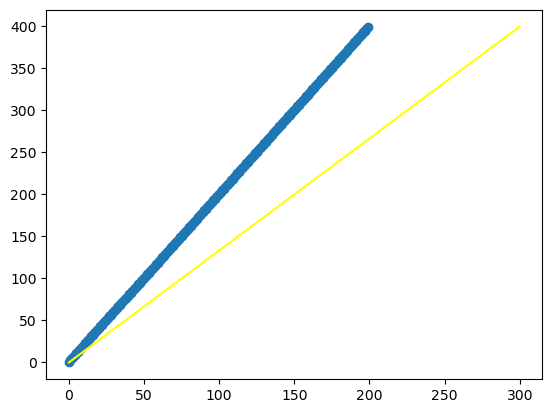

In [17]:
plt.scatter(features , target)
plt.plot([0 , 300] , [0 , 400] , "yellow")

If we test this line on the training data only, we will find that this line is not correct. It is predicting points incorrect, We know that the best fit line we drew first, will predict points wiht lowest incorrect ones. For example the line we just defined if asked the corresponding value of $200$, it will say $250$. But rather it was $400$. There was some `error`, some `loss`, or some `cost` with the `actual` and `predicted` values.

This is the same as the loss we calucalted above for image

For measuring this loss, what we can do is find the difference between the `actual value` and the `predicted value`. A best fit line will give the lowest value of this difference.

One can deifne loss as $$Loss = actual - predicted$$

We only took the example of one value. but there are a large group of values. that can show the same trait, For that we can change the formula to 

Lets denote $actual$ as $a$ and $predicted$ as $p$

$$Loss = (a_1 - p_1) + (a_2 - p_2) + (a_3 - p_3) + ... + (a_n - p_n)$$

or $$Loss = \sum\limits_{i = 1}^{n}a_i - p_i$$ or $$Loss = \sum\limits_{i = 1}^{n}(y_i - \hat y_i)$$

Whenever you see $\hat y$, think of it as the `predicted value`

Now lets assume we have data like this and a random line is drawn like this 

<img src = "https://cdn-media-1.freecodecamp.org/images/MNskFmGPKuQfMLdmpkT-X7-8w2cJXulP3683" width = 400>

If you look closely, a lot of error terms will tend to cancel out each other. We can also get into a state where the line is `not the best fit`, but still gives $0$ error. With the `Loss` we defined before, we are not chossing a `best fit line`. Rather we are chossing a line that is in the `middle` of those points. One way to counter this is to add a `modulus` function like this $$Loss = \sum\limits_{i = 1}^{n}|y - \hat y|$$

But what is a modulus function. The function is nothing but converts, any negative numbers to postive. For example 
$|-1| = 1$

In [18]:
IFrame("https://www.desmos.com/calculator/kamxotjra2" , 1000 , 300)

But there is a problem with this function. A `modulus` is not diffrentiable. You might be thinking that why are we even seeing that part, like we we care for that. Why would you even diffrentiate a loss function. 

We actually diffrentiate loss function in further steps, thats why we will not use the modulus function. 

Another way of doing so is to, square the loss function like this $Loss = (y - \hat y)^2$

Its cool, its good and we can even diffrentiate this...

Now we have a basic idea that we need to compute `m` and `b` for the lowest loss values. Now we should come to know how we can do this 

What if we somehow interelate the `losses` and `m and b`. 


# 2 | SGD 🔱

<img src = "https://i.redd.it/qrxyr8t2m1u51.jpg" width = 500>

Lets assume we intialize the parameters randomly, like this 


In [19]:
weights = np.random.randn(1)
biases = np.random.randn(1)

weights , biases

(array([1.20758388]), array([-0.70909665]))

So the predicitions will be according to the equation $y = mx + b$

In [20]:
pred = weights * 30 + biases
pred

array([35.51841986])

And its way far than what we had expected. 

In [21]:
loss = (pred - 60)
loss

array([-24.48158014])

Our main motive is to reduce this loss as much as possible,. 

What if we subtract a small subset of the derivative of this loss from the parameters like this. The derivative of the loss will show us the steepness of the curve, and thus doing so might get us to the valeus of minimum loss. So how do we find the derivative of this function $Loss = (y - \hat y)^2$. What we know is $\hat y = mx + b$. COmputing this value in we get $$Loss = (y - mx - b)^2$$ Now we can diffrentiate the function

## Diffrentiating wrt `b`
$$\frac {dLoss}{db}= \frac {d}{db}(y - mx - b)^2$$
$$= 2(y - mx - b)(-1)$$

## Diffrentiating wrt `m`
$$\frac {dLoss}{dm} = \frac {d}{dm}(y - mx - b)^2$$
$$= 2(y - mx - b)(-x)$$

In [22]:
weights -= (-2* (60 - weights*30 - biases)) * 0.001
biases -= (2 * 30 * (60 - weights * 30 - biases)) * 0.01

And if we then try to predict the values 

In [23]:
loss = (60 - (weights * 30 + biases))
loss

array([36.82029654])

Our losses have been decreased, so lets do it again 

In [24]:
weights -= -2 * loss * 0.01
biases -= -2 * loss * 0.01

loss = (60 - (weights * 30 + biases))
loss

array([13.99171268])

So now we know if we do this iteratively, we will minimise the loss, and iteratively we will reach the optimal values of `weights` or `m` and `biases` or `m`

Lets say we have runn this again and again for around 100 times 

In [25]:
for _ in range(100):
    weights -= -2 * loss * 0.01
    biases -= -2 * loss * 0.01
    
    loss = (60 - (weights * 30 + biases))

Lets now see the values

In [26]:
weights , biases , loss

(array([2.44429855]), array([-13.32895635]), array([0.]))

Though we have biases as high, but we have almost achived value of `weights`

Also we have made our `loss ~ 0` (as of this run)

Lets do this all again, and now we will also try to plot a graph

In [27]:
weights = abs(np.random.randn(1))
biases = abs(np.random.randn(1))

losses = []

for _ in range(100):
    weights -= -2 * loss * 0.01
    biases -= -2 * loss * 0.01
    
    loss = (60 - (weights * 30 + biases))
    losses.append(loss)

<Axes: >

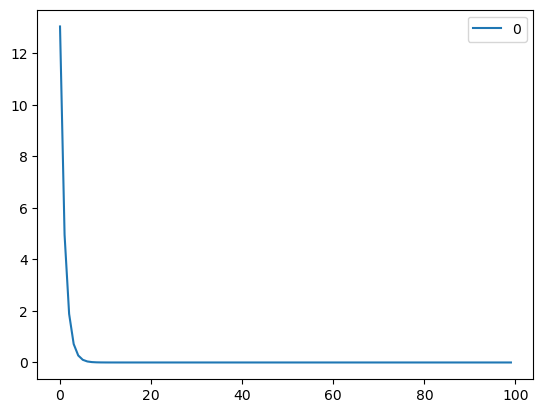

In [28]:
sns.lineplot(np.array(losses))

As we can see we have greatly decreased our losses 

**THIS IS NOT THE FULL IMPLEMENTATION, IT STILL LACKS MANY FUNCTIONALITIES AND IS VULENRABLE TO MANY EDGE CASES, WE WILL IMPROVE THIS IN THE UPCOMING VERSIONS**

**PLEASE COMMENT DOWN IF I DID ANY MISTAKES, OR IF CAN MAKE THIS MORE CONNECTED TO THE GROUND, OR SUGGESTIONS. YOUR ASSISTS ARE HIGHLY APPRECIABLE**

**THATS IT FOR TODAY GUYS**

**HOPE YOU UNDERSTOOD AND LIKED MY WORK**

**DONT FORGET TO MAKE AN UPVOTE $:)$**

<img src = "https://i.imgflip.com/19aadg.jpg">

**PEACE OUT !!!**